In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(precision = 4,linewidth = 100)

In [2]:
mba_salary = pd.read_csv("MBA salary.csv")
mba_salary.head()

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [3]:
import statsmodels.api as sm
X = sm.add_constant(mba_salary['Percentage in Grade 10'])
X.head()

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [4]:
Y = mba_salary['Salary']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_X, test_X,train_Y,test_Y = train_test_split(X,Y,train_size = 0.8,random_state = 100)

In [7]:
mba_salary_lm = sm.OLS(train_Y, train_X).fit()

In [8]:
print(mba_salary_lm.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [9]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2025-05-21 12:48      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

In [10]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<Figure size 800x600 with 0 Axes>

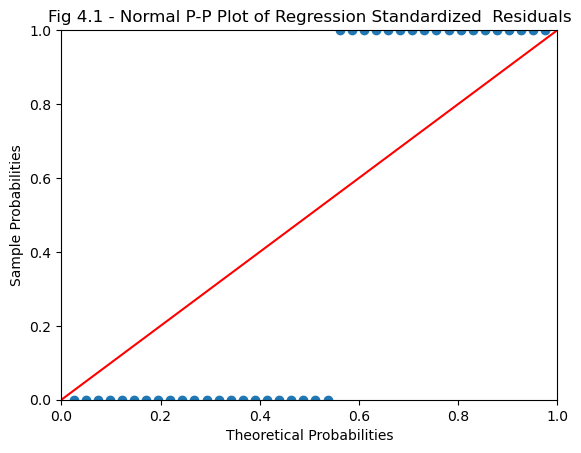

In [13]:
#residual error = actual - predicted
mba_salary_resid = mba_salary_lm.resid  
probplot = sm.ProbPlot(mba_salary_resid)  
plt.figure( figsize = (8, 6)) 
probplot.ppplot( line='45' )
plt.title ( 'Fig 4.1 - Normal P-P Plot of Regression Standardized  Residuals' )
plt.show()

In [14]:
def get_std_values(values):
    return((values-values.mean())/values.std())

Text(0, 0.5, 'Standardized Residuals')

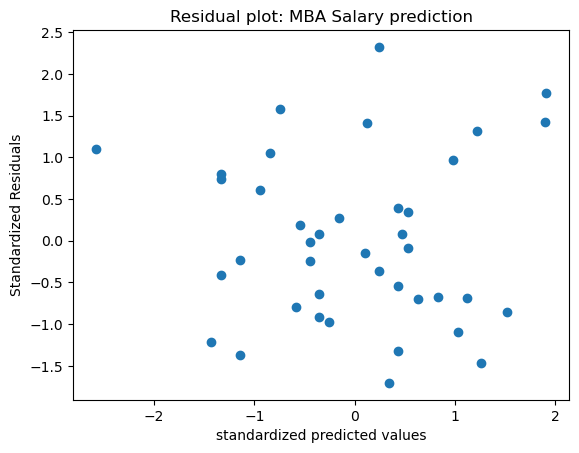

In [24]:
plt.scatter(get_std_values(mba_salary_lm.fittedvalues),get_std_values(mba_salary_resid))
plt.title("Residual plot: MBA Salary prediction")
plt.xlabel("standardized predicted values")
plt.ylabel("Standardized Residuals")

In [17]:
from scipy.stats import zscore

In [19]:
mba_salary['z_score_salary'] = zscore(mba_salary.Salary)

In [20]:
mba_salary[(mba_salary.z_score_salary>3.0)|(mba_salary.z_score_salary)<-3.0]

#any observatin may be flagged as an outliner

,S. No.,Percentage in Grade 10,Salary,z_score_salary


In [23]:
#Cook's distance
'''Cook’s distance measures how much the predicted value of the dependent variable changes for all the 
observations in the sample when a particular observation is excluded from the sample for the estimation 
of regression parameters.'''

'Cook’s distance measures how much the predicted value of the dependent variable changes for all the \nobservations in the sample when a particular observation is excluded from the sample for the estimation \nof regression parameters.'

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
pred_Y = mba_salary_lm.predict(test_X)

In [28]:
np.abs(r2_score(test_Y,pred_Y))

0.156645849742304

In [30]:
#mean squared error
np.sqrt(mean_squared_error(test_Y,pred_Y))
#the smaller the RMSE the better the model is.

73458.04348346895

## Multiple regression

In [31]:
ipl_data = pd.read_csv("IPL_data.csv")

In [35]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [36]:
ipl_data.iloc[0:5,0:10]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93


In [37]:
X_features = ipl_data.columns

In [38]:
ipl_data['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [39]:
categorical_features = ['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP']

In [41]:
#for categorical variables we use get_dummies
ipl_data_encoded = pd.get_dummies(ipl_data[X_features],columns = categorical_features,drop_first = True)

In [42]:
ipl_data_encoded

,Sl.NO.,PLAYER NAME,TEAM,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,1,"Abdulla, YA",KXIP,0,0,0,0.00,0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,Abdur Razzak,RCB,214,18,657,71.41,185,37.6,0,...,0,0,0,0,0,0,0,1,0,0
2,3,"Agarkar, AB",KKR,571,58,1269,80.62,288,32.9,167,...,0,0,0,0,0,0,0,1,0,0
3,4,"Ashwin, R",CSK,284,31,241,84.56,51,36.8,58,...,0,0,0,0,0,0,0,1,0,0
4,5,"Badrinath, S",CSK,63,0,79,45.93,0,0.0,1317,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,"Yadav, AS",DC,0,0,0,0.00,0,0.0,49,...,0,0,0,0,0,0,1,0,0,0
126,127,Younis Khan,RR,6398,7,6814,75.78,3,86.6,3,...,0,1,0,0,0,0,1,0,0,1
127,128,Yuvraj Singh,KXIP+,1775,9,8051,87.58,109,44.3,1237,...,0,0,0,0,0,0,1,0,0,1
128,129,Zaheer Khan,MI+,1114,288,790,73.55,278,35.4,99,...,0,0,0,0,0,0,0,1,0,0


In [43]:
ipl_data_encoded.columns

Index(['Sl.NO.', 'PLAYER NAME', 'TEAM', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S',
       'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'RUNS-S', 'HS', 'AVE', 'SR-B',
       'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR',
       'BASE PRICE', 'SOLD PRICE', 'AGE_2', 'AGE_3', 'COUNTRY_BAN',
       'COUNTRY_ENG', 'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA',
       'COUNTRY_SL', 'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [60]:
X = sm.add_constant(ipl_data_encoded)
Y = ipl_data['SOLD PRICE']
train_X,test_X,train_y,test_y = train_test_split(X,Y,train_size = 0.8,random_state= 42)
